[Ref.] https://shap.readthedocs.io/en/latest/example_notebooks/image_examples/image_classification/Multi-input%20Gradient%20Explainer%20MNIST%20Example.html

In [1]:
!pip3 install shap

     |████████████████████████████████| 371 kB 6.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509239 sha256=da27318da1c5366ece04948a693af121ddbed9848ad4937d8b0708f98467d4f9
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [2]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D

##########################################
# tf.compat.v1.disable_v2_behavior()
##########################################

In [3]:
# load the MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# define our model
input1 = Input(shape=(28,28,1))
input2 = Input(shape=(28,28,1))
input2c = Conv2D(32, kernel_size=(3, 3), activation='relu')(input2)
joint = tf.keras.layers.concatenate([Flatten()(input1), Flatten()(input2c)])
out = Dense(10, activation='softmax')(Dropout(0.2)(Dense(128, activation='relu')(joint)))
model = tf.keras.models.Model(inputs = [input1, input2], outputs=out)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# fit the model
model.fit([x_train, x_train], y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1578 - accuracy: 0.9515
Epoch 2/3
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0616 - accuracy: 0.9804
Epoch 3/3
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0414 - accuracy: 0.9865


In [5]:
import shap

# since we have two inputs we pass a list of inputs to the explainer
explainer = shap.GradientExplainer(model, [x_train, x_train])

# we explain the model's predictions on the first three samples of the test set
shap_values = explainer.shap_values([x_test[:3], x_test[:3]])

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [6]:
# since the model has 10 outputs we get a list of 10 explanations (one for each output)
print(len(shap_values))

10


In [7]:
# since the model has 2 inputs we get a list of 2 explanations (one for each input) for each output
print(len(shap_values[0]))

2


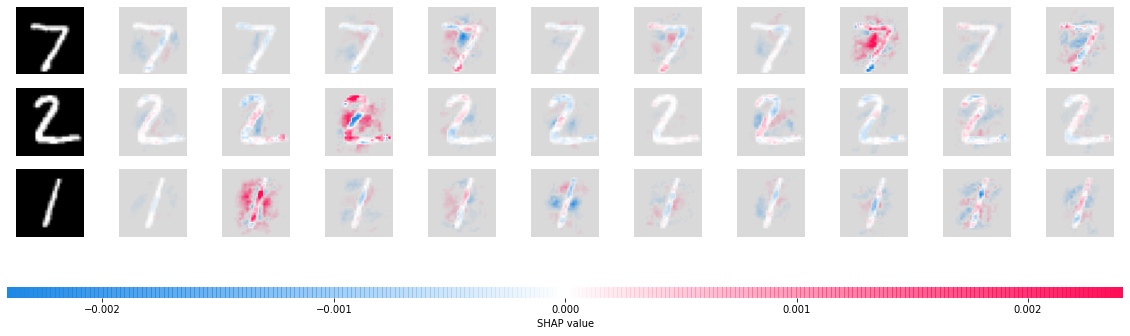

In [8]:
# here we plot the explanations for all classes for the first input (this is the feed forward input)
shap.image_plot([shap_values[i][0] for i in range(10)], x_test[:3])

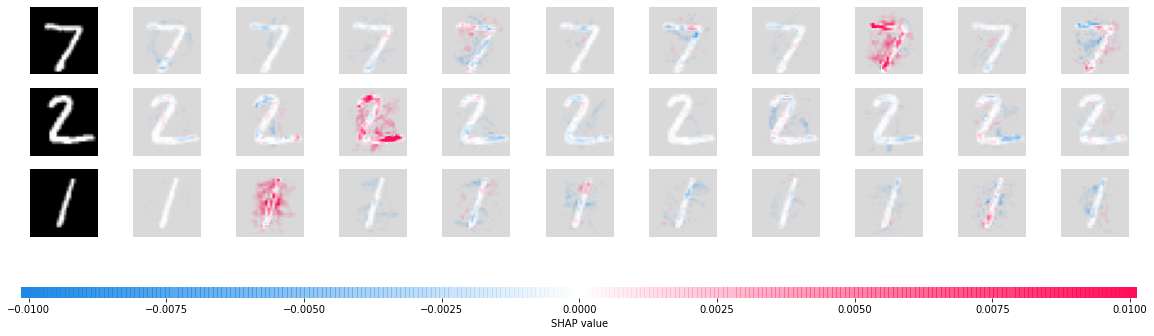

In [9]:
# here we plot the explanations for all classes for the second input (this is the conv-net input)
shap.image_plot([shap_values[i][1] for i in range(10)], x_test[:3])

In [10]:
# get the variance of our estimates
shap_values, shap_values_var = explainer.shap_values([x_test[:3], x_test[:3]], return_variances=True)

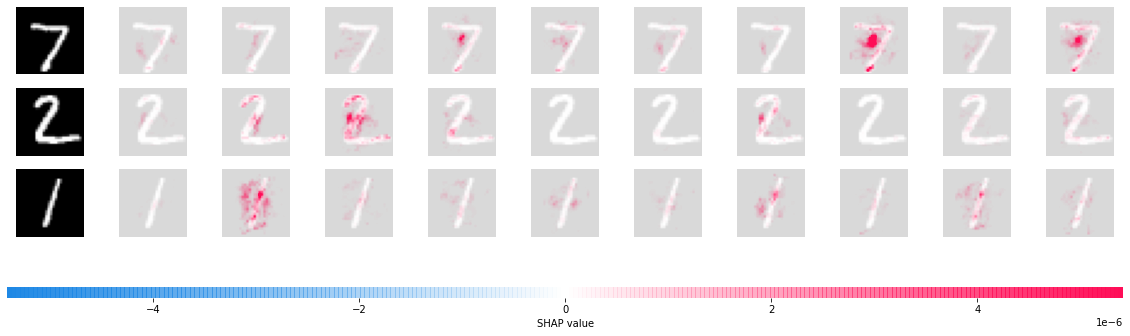

In [11]:
# here we plot the explanations for all classes for the first input (this is the feed forward input)
shap.image_plot([shap_values_var[i][0] for i in range(10)], x_test[:3])